In [109]:
%pylab inline

import os
import wradlib as wrl
import pickle
import pandas as pd
import pyart

from mpl_toolkits.axes_grid1 import make_axes_locatable

Populating the interactive namespace from numpy and matplotlib


In [2]:
flist = os.listdir('./')
accum_files = [f for f in flist if f.startswith('gridded')]

In [19]:
accum = np.empty((300,300))*0.0
for fn in accum_files:
    data, att = wrl.io.from_hdf5(fn)
    accum+=data

In [21]:
accum.max()

613.7438445258886

In [25]:
# Getting back the objects:
with open('radar_grid.pkl','rb') as f:  # Python 3: open(..., 'rb')
    x_rad, y_rad = pickle.load(f)

In [47]:
fname_shp = r'C:\Users\irene\Documents\Work\Data\GIS\CHI_shps\chi_watersheds_wgs84.shp'

dataset, inLayer = wrl.io.open_vector(fname_shp)
borders, keys = wrl.georef.get_vector_coordinates(inLayer, key='name')

In [54]:
borders_shp_US = r'C:\Users\irene\Documents\Work\Data\GIS\states\states_wgs84.shp'

dataset_US, inLayer_US = wrl.io.open_vector(borders_shp)
borders_US, keys_US = wrl.georef.get_vector_coordinates(inLayer_US)

In [55]:
# load CCN gauge locations
CCN_gauge_locations_fname = 'C:/Users/irene/Documents/Work/Data/Cook_County/CookCounty_gage_locations.csv'

df_gauge_loc = pd.read_csv(CCN_gauge_locations_fname,header=0)

x = df_gauge_loc['Longitude - West'].values
y = df_gauge_loc['Latitude'].values

In [99]:
df_imptsites = pd.read_csv('C:/Users/irene/Documents/Work/Data/importantsites.csv',header=0)

In [100]:
sx = df_imptsites['Longitude']
sy = df_imptsites['Latitude']

In [102]:
sx

0   -87.675885
1   -87.687151
2   -88.181798
3   -87.978433
Name: Longitude, dtype: float64

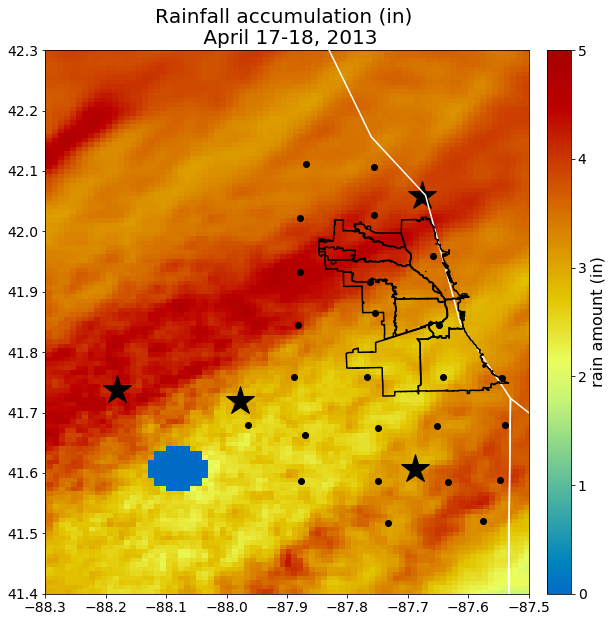

In [117]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, aspect='equal')
pm = ax.pcolormesh(x_rad,y_rad,accum/25.4, vmax=5, cmap=pyart.graph.cm_colorblind.HomeyerRainbow)

plt.plot(x,y,'ko')
plt.plot(sx,sy,'k*', markersize=30)
wrl.vis.add_lines(ax, borders_US, color='white', lw=1.5, zorder=4)
wrl.vis.add_lines(ax, borders, color='black', lw=1.5, zorder=10)
ax.tick_params(axis='both', which='major', labelsize=14)

plt.xlim(-88.3,-87.5)
plt.ylim(41.4,42.3)

plt.title('Rainfall accumulation (in) \n April 17-18, 2013', fontsize=20)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.25)
cb = plt.colorbar(pm, cax=cax)
cb.set_label(label='rain amount (in)', fontsize=16)
cb.ax.tick_params(axis='both', which='major', labelsize=14)


# 